# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

'08f25bacac3c2c2e8123b53e0c3db303'

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
for city in cities: 
    print(city)

Number of cities in the list: 603
san luis
port-vila
zhytkavichy
adamstown
nar'yan-mar
edinburgh of the seven seas
bochum
puerto natales
kudahuvadhoo
yujing
namibe
greymouth
tolanaro
tiksi
bilibino
bredasdorp
hasaki
sinop
kondopoga
osakarovka
puerto san carlos
hamilton
atafu village
key west
bethel
ushuaia
grytviken
port-aux-francais
taiohae
whitehorse
serres
mandal
stanley
weatherford
albany
gisborne
tanumah
yellowknife
olyokminsk
topeka
olonkinbyen
puerto aysen
phang nga
georgetown
ribeira grande
college
hayma'
kapa'a
porbandar
tofol
cumana
karratha
san luis de la loma
alesund
waitangi
porto novo
dudinka
nemuro
hermanus
longyearbyen
north battleford
dali
ra's bayrut
ayutla de los libres
jaguey grande
nova sintra
chibougamau
vorgashor
kodiak
wailua homesteads
adjumani
copala
suntar
bubaque
papao
guerrero negro
kapuskasing
port elizabeth
slave lake
kasempa
fisterra
lagunas
klaksvik
kashgar
mili
aasiaat
okha
haiku-pauwela
jamestown
lata
sao jose da coroa grande
mabaruma
pacific grove
sh

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
params = {
    "q": city,
    "appid": weather_api_key,
    "units": "metric"
}


# Define an empty list to fetch the weather data for each city
city_data = []

# API Key 
api_key = "08f25bacac3c2c2e8123b53e0c3db303"

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={api_key}"


    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san luis
Processing Record 2 of Set 1 | port-vila
Processing Record 3 of Set 1 | zhytkavichy
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | nar'yan-mar
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | bochum
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | kudahuvadhoo
Processing Record 10 of Set 1 | yujing
Processing Record 11 of Set 1 | namibe
Processing Record 12 of Set 1 | greymouth
Processing Record 13 of Set 1 | tolanaro
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | hasaki
Processing Record 18 of Set 1 | sinop
Processing Record 19 of Set 1 | kondopoga
Processing Record 20 of Set 1 | osakarovka
Processing Record 21 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 22 o

In [10]:
# Check to see data is complete 
print(len(city_data))
print(city_data[:5])  

580
[{'City': 'san luis', 'Lat': -33.295, 'Lng': -66.3356, 'Max Temp': 8.47, 'Humidity': 40, 'Cloudiness': 0, 'Wind Speed': 1.02, 'Country': 'AR', 'Date': 1748465566}, {'City': 'port-vila', 'Lat': -17.7338, 'Lng': 168.3219, 'Max Temp': 21.78, 'Humidity': 88, 'Cloudiness': 20, 'Wind Speed': 3.09, 'Country': 'VU', 'Date': 1748465567}, {'City': 'zhytkavichy', 'Lat': 52.2168, 'Lng': 27.8561, 'Max Temp': 13.09, 'Humidity': 98, 'Cloudiness': 59, 'Wind Speed': 2.83, 'Country': 'BY', 'Date': 1748465568}, {'City': 'adamstown', 'Lat': -25.066, 'Lng': -130.1015, 'Max Temp': 21.56, 'Humidity': 57, 'Cloudiness': 65, 'Wind Speed': 7.6, 'Country': 'PN', 'Date': 1748465569}, {'City': "nar'yan-mar", 'Lat': 67.6713, 'Lng': 53.087, 'Max Temp': 10.03, 'Humidity': 75, 'Cloudiness': 21, 'Wind Speed': 3.02, 'Country': 'RU', 'Date': 1748465570}]


In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san luis,-33.2950,-66.3356,8.47,40,0,1.02,AR,1748465566
1,port-vila,-17.7338,168.3219,21.78,88,20,3.09,VU,1748465567
2,zhytkavichy,52.2168,27.8561,13.09,98,59,2.83,BY,1748465568
3,adamstown,-25.0660,-130.1015,21.56,57,65,7.60,PN,1748465569
4,nar'yan-mar,67.6713,53.0870,10.03,75,21,3.02,RU,1748465570


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san luis,-33.2950,-66.3356,8.47,40,0,1.02,AR,1748465566
1,port-vila,-17.7338,168.3219,21.78,88,20,3.09,VU,1748465567
2,zhytkavichy,52.2168,27.8561,13.09,98,59,2.83,BY,1748465568
3,adamstown,-25.0660,-130.1015,21.56,57,65,7.60,PN,1748465569
4,nar'yan-mar,67.6713,53.0870,10.03,75,21,3.02,RU,1748465570


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

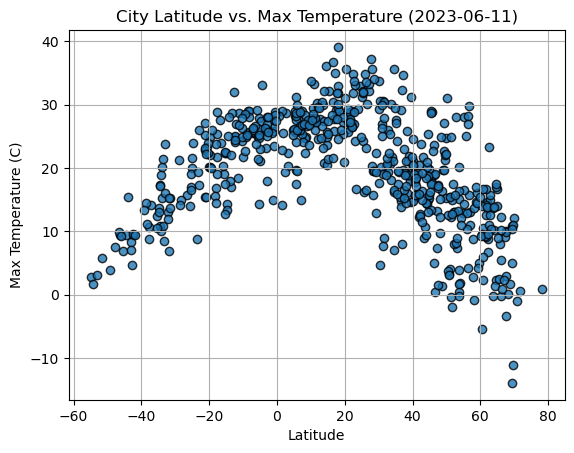

In [16]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", alpha=0.8, edgecolors="black")
plt.title("City Latitude vs. Max Temperature (2023-06-11)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
plt.tight_layout

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

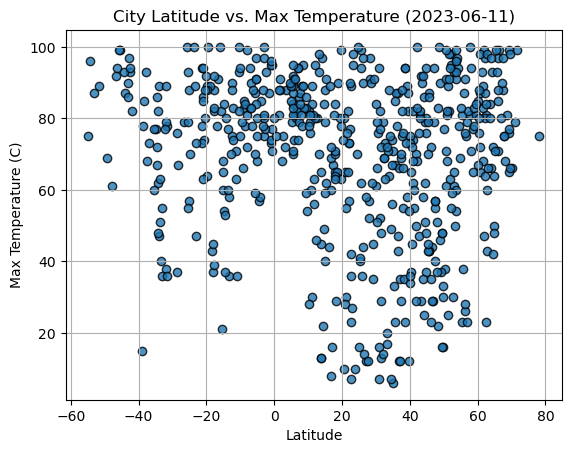

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", alpha=0.8, edgecolors="black")
plt.title("City Latitude vs. Max Temperature (2023-06-11)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
plt.tight_layout

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

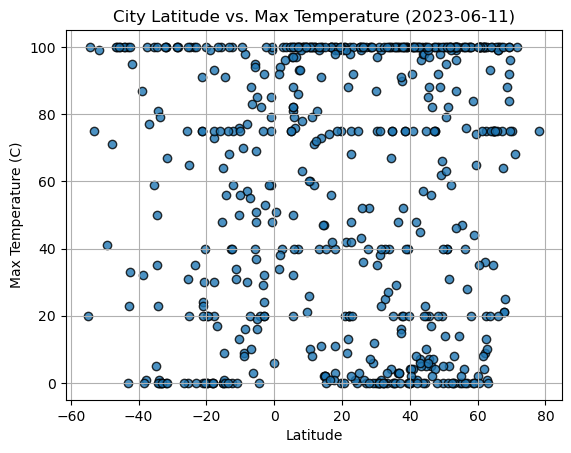

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", alpha=0.8, edgecolors="black")
plt.title("City Latitude vs. Max Temperature (2023-06-11)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
plt.tight_layout

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

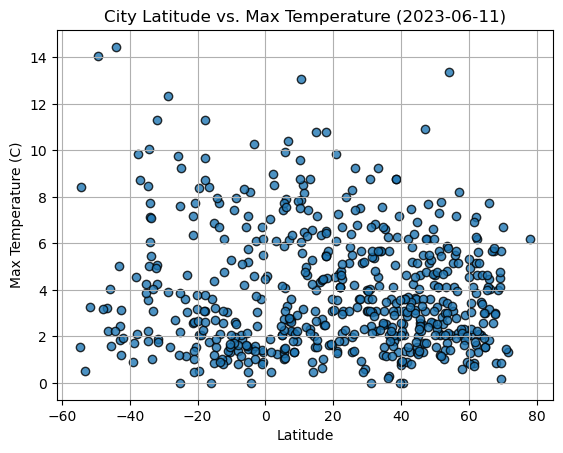

In [20]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", alpha=0.8, edgecolors="black")
plt.title("City Latitude vs. Max Temperature (2023-06-11)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
plt.tight_layout
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def linear_regress_plot(x_values, y_values, y_label, coords): 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    plt.scatter(x_values, y_values, edgecolors="black")
    plt.plot(x_values, regress_values, "r")
    plt.annotate(line_eq, coords, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

    print(f"The r-value is: {rvalue}")

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,zhytkavichy,52.2168,27.8561,13.09,98,59,2.83,BY,1748465568
4,nar'yan-mar,67.6713,53.0870,10.03,75,21,3.02,RU,1748465570
6,bochum,51.4833,7.2167,12.27,82,5,2.10,DE,1748465357
8,kudahuvadhoo,2.6708,72.8944,28.64,75,100,8.53,MV,1748465574
9,yujing,23.1249,120.4614,24.29,95,92,1.81,TW,1748465575


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san luis,-33.2950,-66.3356,8.47,40,0,1.02,AR,1748465566
1,port-vila,-17.7338,168.3219,21.78,88,20,3.09,VU,1748465567
3,adamstown,-25.0660,-130.1015,21.56,57,65,7.60,PN,1748465569
5,edinburgh of the seven seas,-37.0676,-12.3116,14.10,73,77,8.71,SH,1748465571
7,puerto natales,-51.7236,-72.4875,5.75,89,99,3.26,CL,1748465573


###  Temperature vs. Latitude Linear Regression Plot

Northern Hemisphere

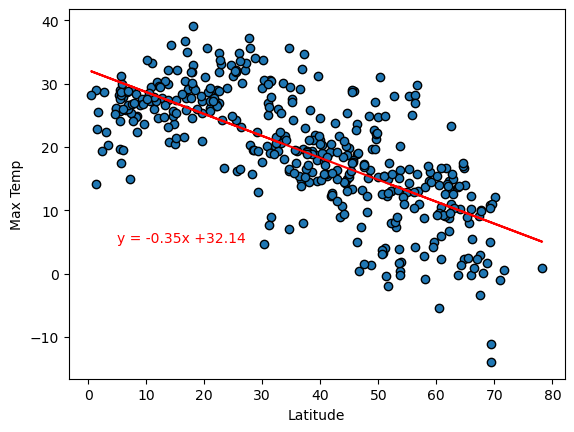

The r-value is: -0.7140844443335402


In [37]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
linear_regress_plot(x_values, y_values, "Max Temp", (5,5))

Southern Hemisphere


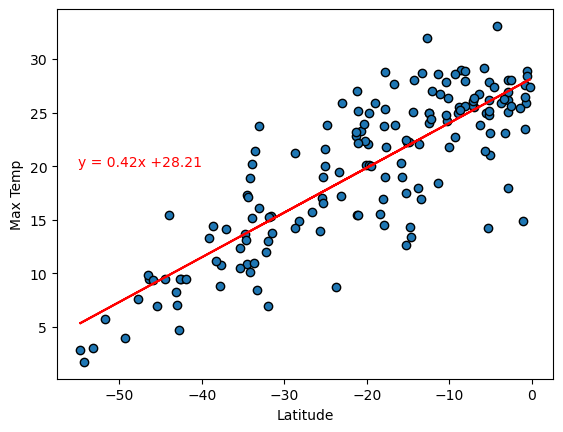

The r-value is: 0.8325503661797377


In [39]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
linear_regress_plot(x_values, y_values, "Max Temp", (-55,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [28]:
# Linear regression 
def linear_regress_plot(x_values, y_values, y_label, coords): 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    plt.scatter(x_values, y_values, edgecolors="black")
    plt.plot(x_values, regress_values, "r")
    plt.annotate(line_eq, coords, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

    print(f"The r-value is: {rvalue}")

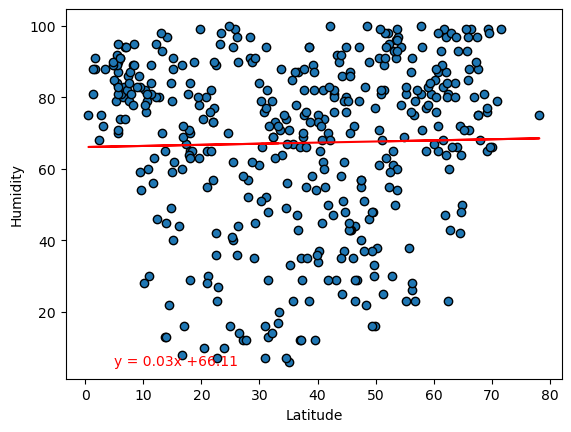

The r-value is: 0.02488278873129918


In [33]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regress_plot(x_values, y_values, "Humidity", (5,5))

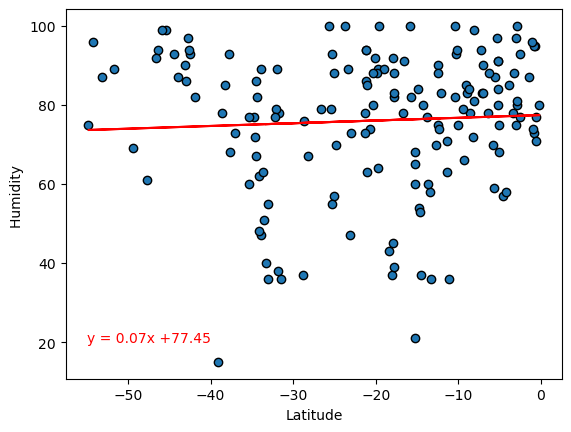

The r-value is: 0.0549119469614975


In [40]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear_regress_plot(x_values, y_values, "Humidity ", (-55,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

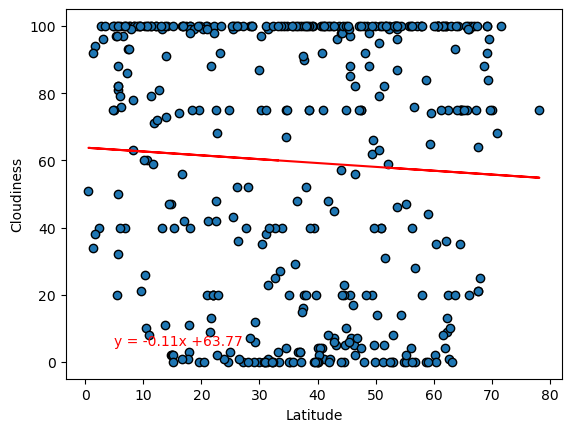

The r-value is: -0.055270545182882096


In [41]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear_regress_plot(x_values, y_values, "Cloudiness", (5,5))

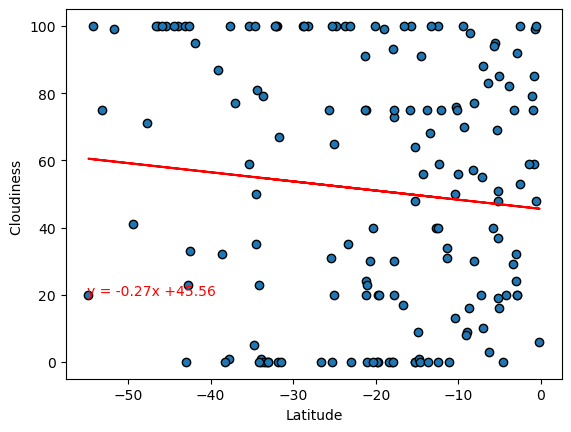

The r-value is: -0.10184101927580812


In [42]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
linear_regress_plot(x_values, y_values, "Cloudiness ", (-55,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

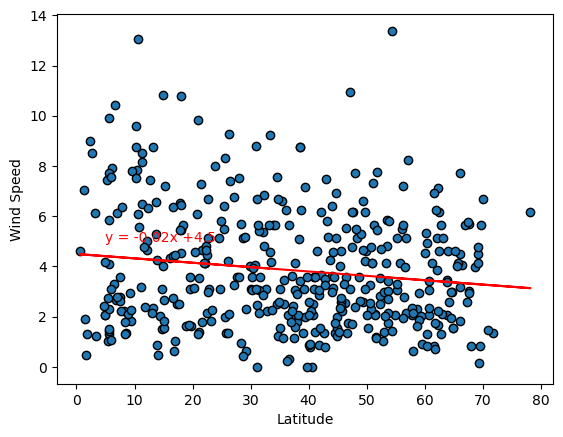

The r-value is: -0.1434415080730969


In [43]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear_regress_plot(x_values, y_values, "Wind Speed", (5,5))

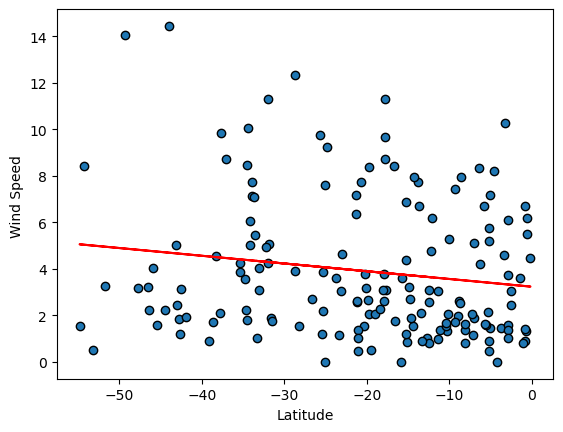

The r-value is: -0.15572837922970492


In [44]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
linear_regress_plot(x_values, y_values, "Wind Speed ", (-55,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE